In [518]:
import random
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(410)
np.random.rand()

0.8874016222166987

In [519]:
def chromosome(popSize):
    return list(np.random.choice([0,1],popSize))

In [520]:
chromosome(6)

[0, 1, 0, 0, 1, 0]

In [521]:
def strategies (popSize,chromLeng):
    return [chromosome(popSize) for x in range(chromLeng)]

In [522]:
pop=strategies(6,50)
len(pop)

50

In [523]:
def CalculatePayoff(strategy1,strategy2):
    payoffs=[[3,3],[0,5],[5,0],[1,1]]
    if strategy1==0 and strategy2==1: # C,D
        payoff=payoffs[1]
    elif strategy1==1 and strategy2==0: # D,C
        payoff=payoffs[2]
    elif strategy1==1 and strategy2==1: # D,D
         payoff=payoffs[3]
    elif strategy1==0 and strategy2==0: # C,C
        payoff=payoffs[0]
    return payoff

In [524]:
def lookupIPDGame(S1,S2,rounds):
    payoffs=[]
    hist1=[]
    hist2=[]
    hist1.append([S1[0],S2[1]])
    hist2.append([S2[0],S1[1]])
    for i in range(rounds):
        pos1=(hist1[0][0]*(2**1))+(hist1[0][1]*(2**0))
        pos2=(hist2[0][0]*(2**1))+(hist2[0][1]*(2**0))
        payoffs.append(CalculatePayoff(S1[pos1],S2[pos2]))
        newhist1=[S1[pos1],S2[pos2]]
        newhist2=[S2[pos2],S1[pos1]]
        hist1[0],hist2[0]=newhist1,newhist2
    pay1,pay2=0,0
    for i in range(len(payoffs)):
        pay1+=payoffs[i][0]
        pay2+=payoffs[i][1]
    
      
    return pay1/rounds,pay2/rounds

In [525]:
S1=[0,1,0,1,0,0]
S2=[1,1,0,0,0,1]
lookupIPDGame(S1,S2,100)

(2.5, 2.5)

In [526]:
def Games(pop,rounds):   #Tournment of each strategy Versus all other strategies in pop
    games=[]
    for i in range(len(pop)):
        game=[]
        #payoff=lookupIPDGame(pop[i],pop[i],rounds)
        #game.append([payoff[0],payoff[1]])
        for j in range(i+1,len(pop)):
            payoff=lookupIPDGame(pop[i],pop[j],rounds)
            game.append([payoff[0],payoff[1]])
            
        if len(game)!= len(pop):
            k=i-1
            for h in range(i):
                payoff=[]
                payoff=games[h][k]
                payoff.reverse()        #Not to repeat an already played game, reverse payoff  
                game.append(payoff)         #then append it to its correspondin Strategy 
                k-=1          
        games.append(game)
    return games
    

In [527]:
Return=Games(pop,100)
print(len(Return[0]))


49


In [528]:
def Fitness(Return,rounds,PopSiz):
    game=[]
    Fitness=[]   #All Strategies PayOffs
    for i in range (len(Return)):
        game=Return[i]
        payoff=0
        for j in range(len(game)):
            payoff+=game[j][0]    #PayOff of Each Strategy
        Fitness.append(payoff/(PopSiz)) #Average Fitness per round per All Strategies      
    return Fitness        

In [529]:
fit=Fitness(Return,50,50)
print(len(fit))

50


In [530]:
def elitism(fitness,pop):
    maxfit=0
    bestPop=[]
    best_fit=[]
    for j in range(2):
        maxfit=max(fitness)
        for i in range(len(fitness)):
            if maxfit==fitness[i]:
                bestPop.append(pop[i]) 
                pop.remove(pop[i])
                best_fit.append(fitness[i])
                fitness.remove(fitness[i])   
                break
            else:
                continue
         
    return bestPop, fitness, pop,best_fit

In [531]:
elit=elitism(fit,pop)
print(len(elit[2]),len(elit[1]))

48 48


In [532]:
def evaluateRF (fitness):
    rfProb=[]
    sumOfFitness=0
    for i in range(len(fitness)):
        sumOfFitness+= fitness[i]
    for i in range(len(fitness)):
        rfProb.append(fitness[i]/sumOfFitness)
    return rfProb

In [533]:
RF=evaluateRF (elit[1])
print(RF)

[0.02366991697928394, 0.030439795526200335, 0.011556919016539526, 0.020462684891998248, 0.018093822592110145, 0.018918588001618924, 0.028739248290099755, 0.028739248290099755, 0.026179924699768386, 0.028314111481074614, 0.014859381749046843, 0.020137880369903036, 0.014753947820408609, 0.015139972043003437, 0.02035214932165171, 0.02265809137380409, 0.015148474779183943, 0.01283913163255936, 0.0253381538178986, 0.01994401798498757, 0.018093822592110145, 0.02491301700887346, 0.01880975297850849, 0.022132622277849012, 0.016287841427371327, 0.02321246977277288, 0.02321246977277288, 0.022442121874819313, 0.021032368216091935, 0.01900021426895175, 0.021937059345697448, 0.01964132057696167, 0.021086785727647158, 0.024423259404876486, 0.020236512109596868, 0.021894545664794936, 0.02261727824013768, 0.021003458913078234, 0.018093822592110145, 0.01860058566846811, 0.01808531985592964, 0.01897470606041024, 0.01811082806447115, 0.01851045666495478, 0.017685691255446005, 0.021967669195947257, 0.0230

In [534]:
def Calc_Commulative_fit(fit):
    CommulativeFit = []
    temp=0.0
    for i in range(len(fit)):
        CommulativeFit.append(fit[i]+temp)
        temp= CommulativeFit[i]
    return CommulativeFit

In [535]:
CF=Calc_Commulative_fit(RF)
print(len(CF))

48


In [536]:
def RW_selection(comDist,Individuals):
    #print(randVar)
    selected=[]
    for i in range(len(comDist)):
        randVar=np.random.rand()
        for x in range(len(Individuals)):
            #print(x)
            if comDist[x] >= randVar:
                selected.append(Individuals[x])
                break
            else:
                continue
                    
    return selected

In [537]:
selected_strategies=RW_selection(CF,elit[2])
print(len(selected_strategies))

48


In [538]:
def crossOver(popSiz,indSiz, selected_ind,pCross = 0.6):
    newpop =[]
    
    
    while len(newpop) != popSiz-2:
        for x in range (0,np.shape(selected_ind)[0],2):
                cutPoint=np.round(np.random.rand()*(indSiz-1))
                
                p1=selected_ind[x]
                p2=selected_ind[x+1]
                offspring1 =[]
                offspring2= []
                

                crossProb=np.random.rand()

                if crossProb > pCross :
                    newpop.append(p1)
                    newpop.append(p2)
                else: 
                    for i in range (0,int(cutPoint),1):
                        offspring1.append(p1[i])
                    for i in range ((int(cutPoint)),len(p2),1):
                        offspring1.append(p2[i])
                    for i in range (0,int(cutPoint),1):
                        offspring2.append(p2[i])
                    for i in range ((int(cutPoint)),len(p2),1):                         
                        offspring2.append(p1[i])
                    newpop.append(offspring1)
                    newpop.append(offspring2)
    return newpop



In [539]:
new_strategies=crossOver(50,6, selected_strategies,pCross = 0.6)
print(len(new_strategies))

48


In [540]:
def mutation(pop,indSiz,elit,pmuta=0.01):
    fine_pop = []
    for i in range(np.shape(pop)[0]):
        p=pop[i]
        for x in range (0,indSiz,1):
            mut_prob=np.random.rand()
            if  mut_prob < pmuta :
                p[x] = type(p[x])(not p[x])
            else:
                continue
        fine_pop.append(p)
    fine_pop.append(elit[0])
    fine_pop.append(elit[1])
    return fine_pop


In [541]:
mutated_strategies=mutation(new_strategies,6,elit[0])
print(mutated_strategies)

[[0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 1], [1, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 1], [1, 1, 1, 1, 0, 1], [0, 0, 1, 0, 1, 1], [0, 0, 1, 1, 0, 1], [1, 1, 0, 0, 1, 1], [1, 1, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0], [0, 1, 0, 0, 1, 1], [1, 1, 1, 1, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 1, 1, 1, 1], [0, 0, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0], [0, 1, 1, 1, 1, 1], [0, 0, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0], [0, 0, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 1], [1, 0, 1, 0, 0, 0], [0, 1, 0, 1, 1, 1], [0, 0, 1, 1, 1, 1], [0, 0, 1, 0, 1, 0], [0, 0, 0, 1, 1, 0], [1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0], [1, 1, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1], [1, 0, 1, 1, 1, 1], [1, 1, 0, 1, 0, 0], [0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 0], [0, 1, 1, 1, 1, 0], [0, 1, 0, 1, 1, 0], [1, 0, 0, 1, 1, 1], [0, 1, 0, 1, 0, 0], [0, 0, 0, 1, 1, 0], [1, 0, 1, 0, 1, 1], [0, 1, 0, 0, 1, 1], [0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 0], [0, 0, 1, 1, 0, 1]]

In [542]:
def GA(popSize,numOfGeneration,chromLeng,rounds): 
    FinalPop=[] 
    AAPayOff=[] 
    APayOff=[]
    for i in range(0,numOfGeneration): 
        fit=0 
        if i==0: 
            Pop=strategies(chromLeng,popSize) 
        else: 
            Pop=MutatedPopulation 
        Return=Games(Pop,rounds) 
        fitness=Fitness(Return,rounds,popSize)
        elit=elitism(fitness,Pop) 
        RF = evaluateRF (elit[1]) 
        comDist=Calc_Commulative_fit(RF) 
        selectedIndv = RW_selection(comDist,elit[2]) 
        newPopulation= crossOver(popSize,chromLeng, selectedIndv ) 
        MutatedPopulation= mutation(newPopulation,chromLeng,elit[0])
       #FinalPop.append(MutatedPopulation)
        Best_Fitness=elit[0]
        fit=sum(fitness)/popSize
        APayOff.append(sum(fitness)/numOfGeneration)
        AAPayOff.append(fit)
    return APayOff,AAPayOff, elit[3],elit[0]



In [543]:
RunGA=GA(100,300,6,100)
print("PayOffs: ",RunGA[1],"Best two Strategies : ",RunGA[3])

PayOffs:  [2.1494280000000012, 2.2579259999999994, 2.230924, 2.5446320000000004, 2.4779419999999996, 2.6499679999999985, 2.5970269999999998, 2.479211000000001, 2.4618140000000004, 2.618535, 2.6925929999999996, 2.5533219999999988, 2.725591000000001, 2.6282889999999997, 2.5127550000000003, 2.795654000000001, 2.7728439999999988, 2.7312120000000006, 2.5772280000000016, 2.683776000000002, 2.714826000000001, 2.6489320000000007, 2.688568, 2.729972, 2.7376500000000004, 2.726847999999998, 2.8094359999999994, 2.8721340000000044, 2.7514219999999985, 2.849644, 2.7778149999999986, 2.826857, 2.611453000000001, 2.7154139999999996, 2.8159029999999996, 2.855515999999996, 2.841669, 2.755124000000001, 2.752255, 2.8492350000000006, 2.7940049999999985, 2.821255, 2.842121000000002, 2.8744919999999983, 2.8823369999999984, 2.7526800000000002, 2.7372860000000014, 2.7618490000000016, 2.7116219999999993, 2.8131490000000015, 2.7855639999999995, 2.7326239999999995, 2.8732830000000003, 2.8675010000000043, 2.9151820

Text(0,0.5,'Average Average payoffs')

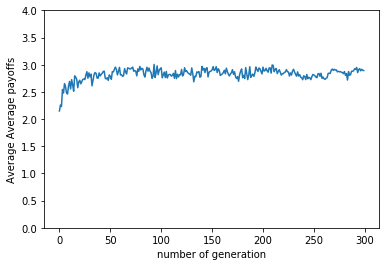

In [546]:
plt.plot(RunGA[1])
plt.xlabel('number of generation')
plt.ylim([0,4])
#plt.ylabel('Average payoffs')
plt.ylabel('Average Average payoffs')